In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 1.33 ms


In [2]:
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists
time: 124 ms


In [3]:
cd dataset

/content/dataset
time: 3.66 ms


In [4]:
!mkdir withmasks

mkdir: cannot create directory ‘withmasks’: File exists
time: 110 ms


In [5]:
cd /content/dataset

/content/dataset
time: 1.95 ms


In [6]:
!mkdir withoutmasks

mkdir: cannot create directory ‘withoutmasks’: File exists
time: 115 ms


In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
dataset=[]
flat_data=[]
datadir = '/content/dataset'
categories = ['withmasks', 'withoutmasks']

for cate in categories:
  c_num = categories.index(cate)
  path = os.path.join(datadir, cate)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    dataset.append(img_resized)
    target.append(c_num)

flat_data = np.array(flat_data)
target = np.array(target)
dataset = np.array(dataset)

time: 10.1 s


<BarContainer object of 2 artists>

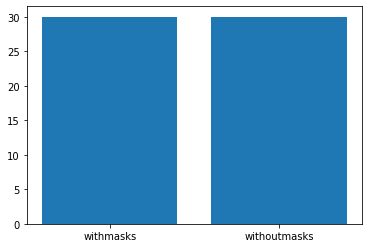

time: 172 ms


In [8]:
unique, count = np.unique(target, return_counts=True)
plt.bar(categories, count)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boton =load_boston()
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state=1)


time: 156 ms


In [11]:
from sklearn.svm import SVC
SVModel = SVC(kernel = 'sigmoid', C=1, gamma = 'auto')
SVModel.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 188 ms


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_train, SVModel.predict(x_train))

0.5476190476190477

time: 168 ms


In [14]:
from sklearn.svm import SVC
SVModel = SVC(kernel = 'linear', C=1, gamma = 'auto')
SVModel.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 180 ms


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_train, SVModel.predict(x_train))*100

100.0

time: 169 ms


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, SVModel.predict(x_test))*100

61.111111111111114

time: 77.1 ms


In [20]:
krn = ['linear', 'poly', 'rbf', 'sigmoid']
rng_C = np.arange(1,52,10)
rng_deg = np.arange(3,8)
rng_co = np.arange(0.001, 10, 0.5)
rng_gam = ['auto', 'scale']

time: 2.2 ms


In [23]:
best_score=0
for i in krn:
  for j in rng_C:
    for k in rng_deg:
      for z in rng_co:
        for x in rng_gam:
          SVModel = SVC(kernel = i, C=j, degree = k, coef0 = z, gamma = x)
          SVModel.fit(x_train, y_train)
          acc_score = accuracy_score(y_test, SVModel.predict(x_test))*100
          if best_score<acc_score:
            best_score = acc_score
            bi = i
            bj = j
            bk = k
            bz = z
            bx = x
print(best_score, bi, bj, bk, bz, bx)

77.77777777777779 sigmoid 51 3 0.501 auto
time: 19min 7s


In [44]:
svm_classifier = SVC(gamma= 'auto', kernel = 'sigmoid', degree = 3, C = 51, coef0 = 0.501 )
svm_classifier.fit(x_train, y_train)

SVC(C=51, break_ties=False, cache_size=200, class_weight=None, coef0=0.501,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 174 ms


In [45]:
import pickle
pickle.dump(SVModel, open('img_model.p','wb'))

time: 68.6 ms


In [46]:
model = pickle.load(open('img_model.p','rb'))

time: 8.53 ms


Enter your urlhttps://img.etimg.com/thumb/msid-76746979,width-650,imgsize-94706,,resizemode-4,quality-100/istock-533567012-1.jpg
(488, 650, 3)
 PREDICTED OUTPUT: withmasks


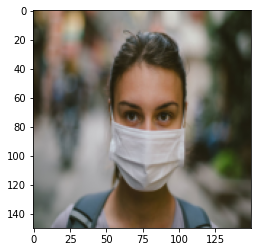

time: 13.8 s


In [47]:
flat_data= []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')


In [4]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok 

     |████████████████████████████████| 7.4MB 6.9MB/s 
     |████████████████████████████████| 112kB 51.5MB/s 
     |████████████████████████████████| 4.5MB 49.4MB/s 
     |████████████████████████████████| 163kB 55.6MB/s 
     |████████████████████████████████| 6.9MB 39.2MB/s 
     |████████████████████████████████| 133kB 52.5MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 122kB 56.3MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 143kB 38.8MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=d6a326be1b7e482025e9ff3144756471da1a34d42bac7d5fd1b60071c01e2f75
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.4-cp36-none-any.whl size=74841 sha256=2c1627ec73464b29c96e15029261ee0c04ebf063e

  Created wheel for pyngrok: filename=pyngrok-5.0.0-cp36-none-any.whl size=18780 sha256=dcc484757e9247f492c267e48d479e5d3d47bfd55e429a521ae50db59782a423
  Stored in directory: /root/.cache/pip/wheels/95/df/23/af8dde08c3fcdc7b966adcacef48ab29aa3b0b1860df5d2b79
Successfully built pyngrok
time: 27.3 s


In [48]:
%%writefile app.py 
import pickle
import streamlit as st
import numpy as np
import skimage.io import imreadfrom skimage.transform import resize
import PIL import image
st.title("IMAGE CLASSIFICATION")
st.text('Upload the image')
model = pickle.load(open('img_model.p', 'rb'))
ufile = st.file_uploader("choose your file:", type ='jpg')
if ufile is not None:
  img = Image.open(uploaded.file)
  st.img(img, caption = 'Image')

if st.button('Predict'):
  categories = ['withmasks', 'withoutmasks']
  st.write('Prediction is')
  flat_data=[]
  img_resized = resize(img,(150,150,3))
  flat_data.append(img_resized.flatten())
  flat_data = np.array(flat_data)
  plt.imshow(img_resized)
  y_out = model.predict(flat_data)
  y_out = categories[y_out[0]]
  st.write(f' PREDICTED OUTPUT: {y_out}')


Writing app.py
time: 3.13 ms


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port = '8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://d83f05f17dd1.ngrok.io" -> "http://localhost:80">

time: 1.52 s
